Experiment with different parameter settings. Be sure to add a plot of the proportion of healthy and
infected hosts over time to the simulation. What patterns to you see? Have the
host­pathogen code available so that you can refer to it in class.

In [60]:
import matplotlib.pyplot as plt
import numpy as np

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 50
height = 50
initProb = 0.01
infectionRate = 0.85
regrowthRate = 0.15

def init():
    global time, config, nextConfig, density_list
    density_list = []
    time = 0
    
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 2, cmap = PL.cm.jet)
    PL.axis('image')
    PL.title('t = ' + str(time))
    
def record_density():
    '''
    Appends the proportion of healthy individuals in population 
    in current state to density_list
    '''
    global time, config, nextConfig, density_list
    healthy = np.count_nonzero(config==1)
    infected = np.count_nonzero(config==2)
    density_list.append(healthy/(healthy+infected))

def step():
    global time, config, nextConfig, density_list
    
    record_density()
    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if RD.random() < regrowthRate:
                                state = 1
            elif state == 1:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if RD.random() < infectionRate:
                                state = 2
            else:
                state = 0

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

In [61]:
init()
for i in range(100):
    step()

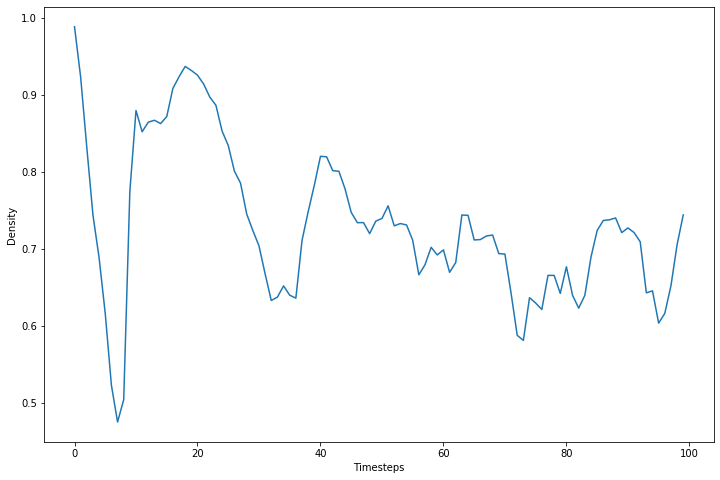

In [63]:
#Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(list(range(100)), density_list, label="Density of panicky individuals over time")
plt.xlabel("Timesteps")
plt.ylabel("Density")
plt.show()

In [65]:
#Experimenting with long-term density behavior as a function of intial p

long_term_behavior_list = []
initial_proportion_list = []
#Vary initial p, starting at 10%, increment by 5%
for percentage in range(10, 110, 5):
    p = percentage/100
    initial_proportion_list.append(p)
    init()
    for i in range(20):
        step()
    #Store density at last time step of simulation
    long_term_behavior_list.append(density_list[-1])

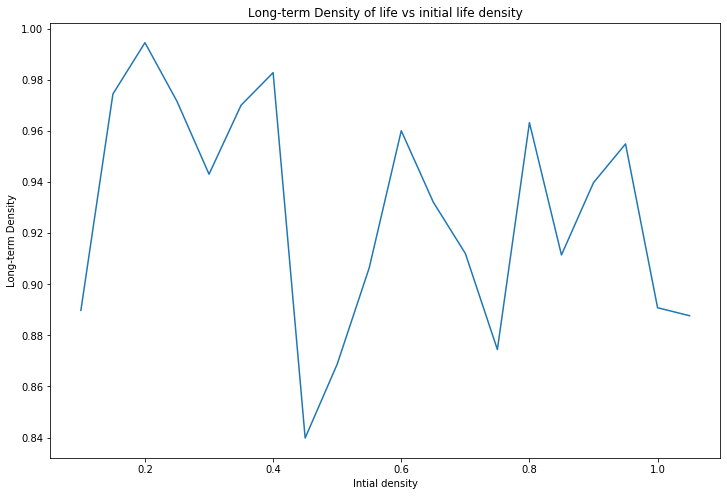

In [66]:
#Visualize
plt.figure(figsize=(12, 8))
plt.plot(initial_proportion_list, long_term_behavior_list)
plt.title("Long-term Density of life vs initial life density")
plt.xlabel("Intial density")
plt.ylabel("Long-term Density")
plt.show()

## Sayama Exercise 12.6. 
Hint: to prove that all those complicated expressions sum to 1,
use the definition of the binomial distribution. All probability distributions have to sum to 1
by definition.

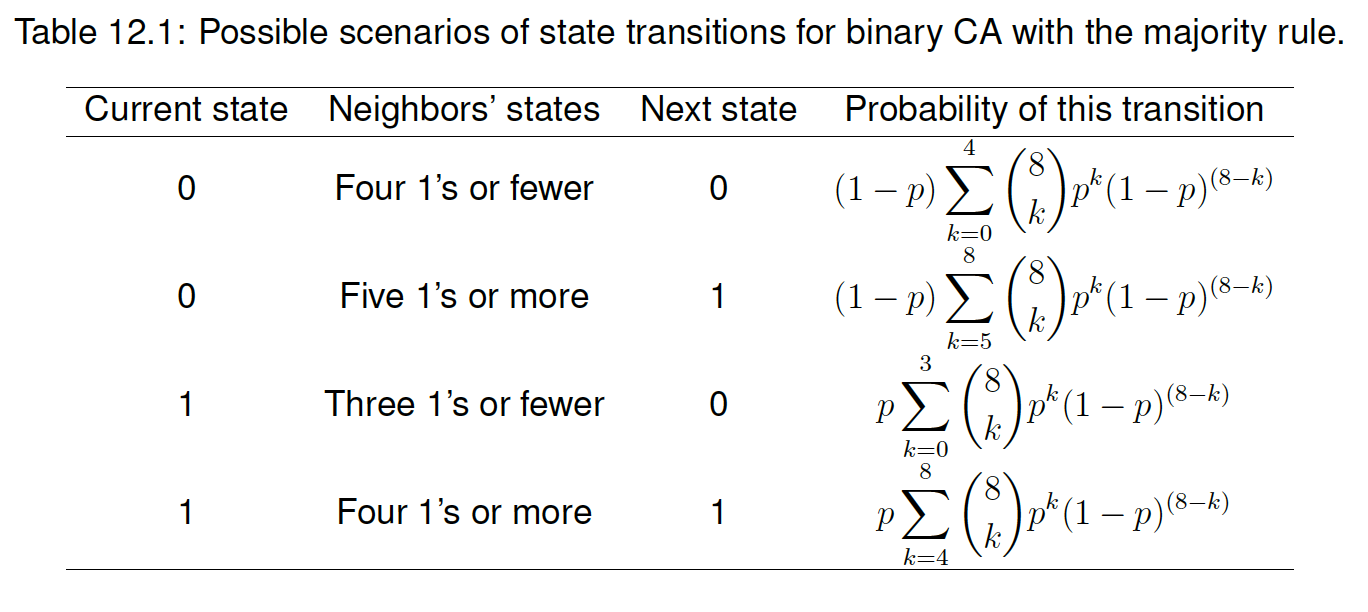

The possible current states are [0, 1], with associated probabilities  p and (1-p), respectively.

We start by showing that P(1 or 0 | 0)=1 and P(1 or 0 | 1)=1. Since we must start in either current state 0 or when, it follows that p * P(1 or 0 | 1) + (1-p) * P(1 or 0 | 1) = p+(1-p)=1.

Begin by noticing that, up to the conditioning factor (1-p), the summations of the first two rows take the form of the binomial cdf. The cdf, when evaluated over the entire support is by definition 1. We now have to show that summing the summations in the two first rows, excluding (1-p), is equivalent to summing the cdf over the entire support. This is true since 0 through 8 is the entire support. Thus, row1+row2 = P(1 or 0 | 0)=1.

The same argument is used for rows 3 and 4, however this time excluding p rather than (1-p).

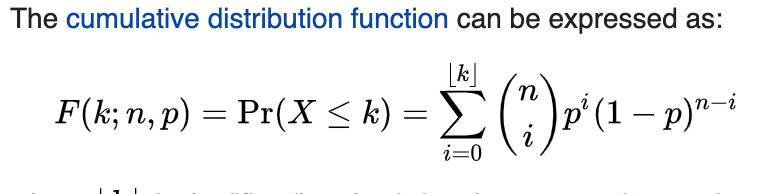

We first need to define the probability of the next state being 1 in the Game of Life. p_t+1 can be 1 if p_t is 0 or 1. We define the probabilities associated with each case, compute their sum and simplify.

In the Game of Life, if there are 4 or 3 1s in your neighbourhood of 5, then you stay alive. If dead, you become alive if there are 3 1s in your neighbourhood.

Since typesetting in here is annoying, I will switch to mathematica and screenshot my results.

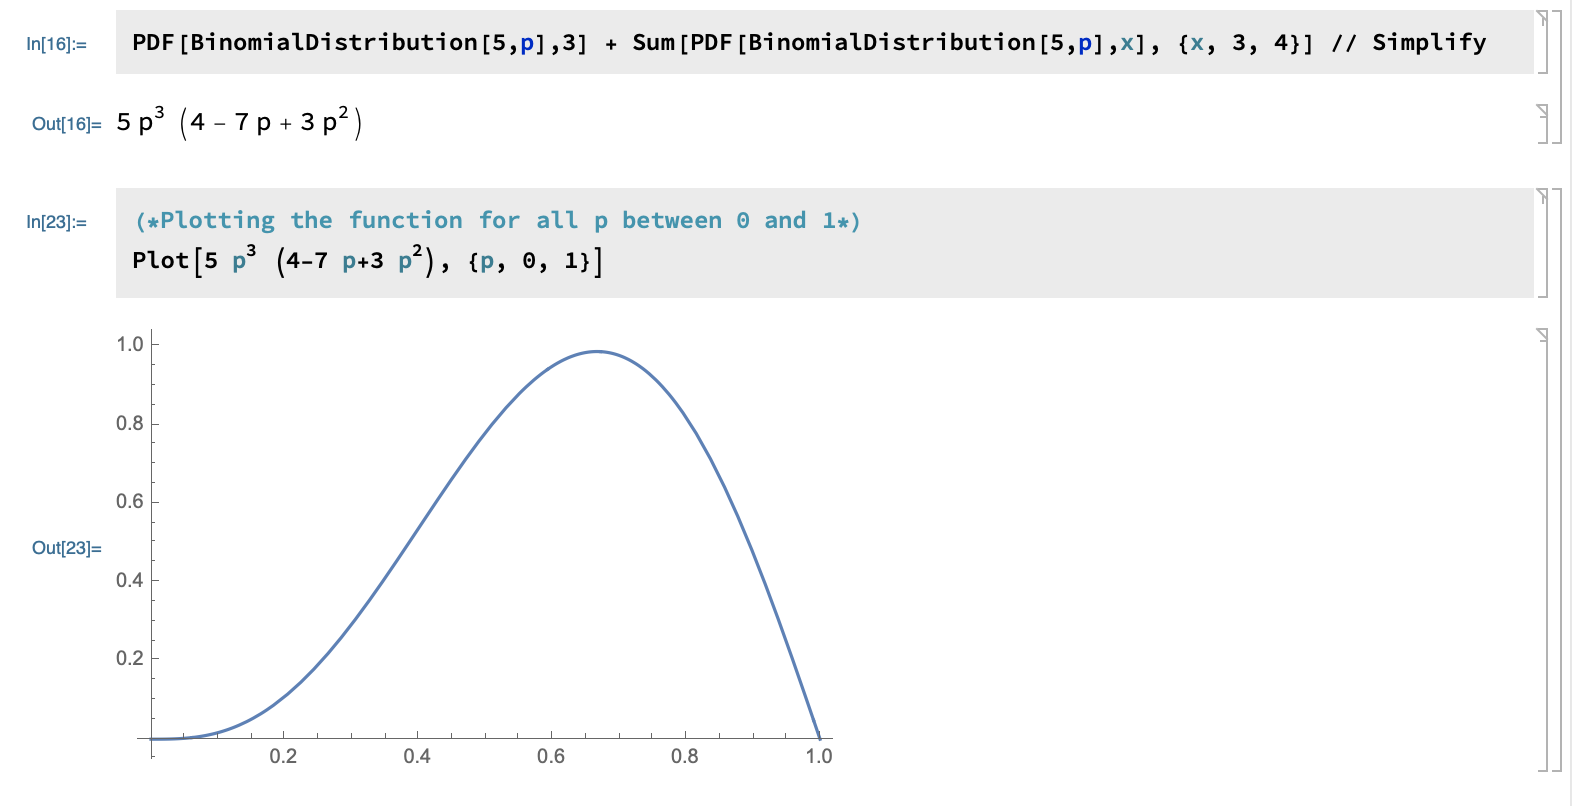

The first term is the probability of having exactly 3 in your neighbourhood, i.e. coming alive. The second term is the probability of having three or four alive in your neighbourhood, i.e. staying alive.